In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
with open('toyota.csv') as ftr:
    content = ftr.read()
    content = content.encode("ascii", "ignore").decode("ascii", "ignore")
    with open('toyota_cleaned.csv','w') as ftr1:
        ftr1.write(content)

In [6]:
data = pd.read_csv('toyota_cleaned.csv')
data.head()

,Id,Model,Price,Age_06_15
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,57
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,57
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,58
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,60
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,64


In [7]:
data.shape

(1436, 4)

In [8]:
data.describe()

,Id,Price,Age_06_15
count,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,89.947075
std,416.476890,3626.964585,18.599988
min,1.000000,4350.000000,35.000000
25%,361.750000,8450.000000,78.000000
50%,721.500000,9900.000000,95.000000
75%,1081.250000,11950.000000,104.000000
max,1442.000000,32500.000000,114.000000


In [9]:
data.isnull().sum()

Id           0
Model        0
Price        0
Age_06_15    0
dtype: int64

In [10]:
data.drop(['Id','Model'], axis=1, inplace=True)

In [11]:
data.shape

(1436, 2)

In [12]:
data.head()

,Price,Age_06_15
0,13500,57
1,13750,57
2,13950,58
3,14950,60
4,13750,64


In [13]:
data["Price"].shape, data["Age_06_15"].shape

((1436,), (1436,))

In [14]:
X = data['Age_06_15']
y = data['Price']

In [15]:
X.shape, y.shape

((1436,), (1436,))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [17]:
y_train.shape, X_train.shape

((1005,), (1005,))

In [18]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test  = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [19]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg_fit = lg.fit(X_train, y_train)

In [20]:
pred_train = lg.predict(X_train)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
mean_squared_error(pred_train, y_train)

3094612.5079865563

In [23]:
pred_test = lg.predict(X_test)

In [24]:
mean_squared_error(pred_test, y_test)

2927680.449429757

In [25]:
lg.intercept_, lg.coef_


(array([26106.5690665]), array([[-170.82960246]]))

In [26]:
r2_score(y_train, pred_train)

0.758966145927579

In [27]:
r2_score(y_test, pred_test)

0.788483000739442

In [28]:
#model.score(pd.DataFrame(X_train), pd.DataFrame(y_train))

In [29]:
import numpy as np
import statsmodels.api as sm

results = sm.OLS(y, X).fit()


In [30]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              4509.
Date:                Thu, 07 Apr 2022   Prob (F-statistic):                        0.00
Time:                        19:40:34   Log-Likelihood:                         -14422.
No. Observations:                1436   AIC:                                  2.885e+04
Df Residuals:                    1435   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
X.skew(axis = 0) 

-0.826701873098419

In [32]:
data.columns

Index(['Price', 'Age_06_15'], dtype='object')

In [33]:
from scipy.stats import skew
skew(data['Price']),skew(data['Age_06_15'])

(1.702104639170028, -0.8258380758865851)

<AxesSubplot:>

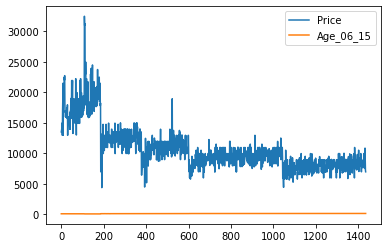

In [34]:
data.plot()